Datasets used: 110 

Plotting heatmap...


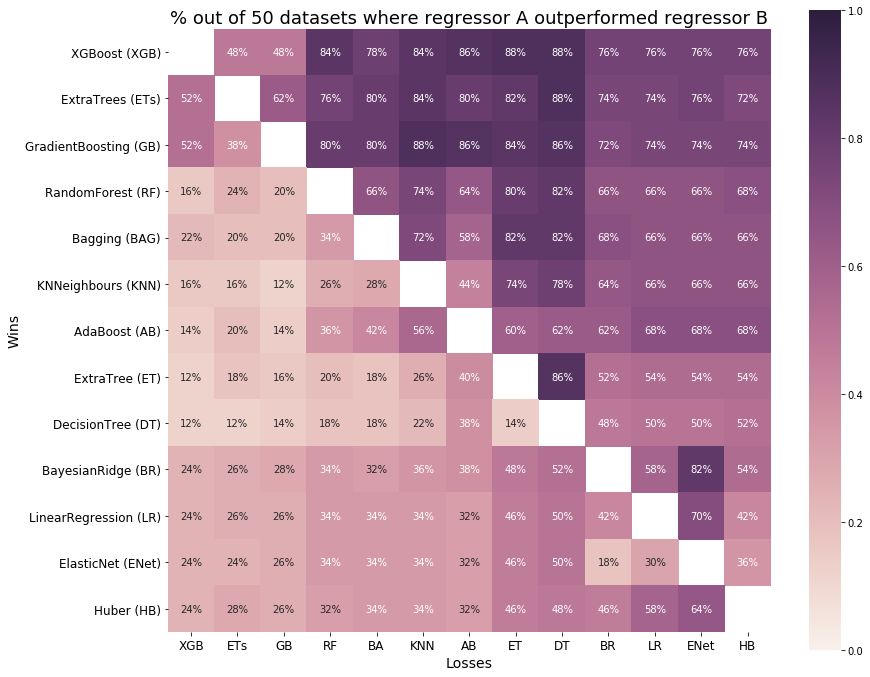

Total time taken: 12 seconds


In [3]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
import warnings
import seaborn as sb
import operator

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.io as pio


warnings.filterwarnings('ignore')

start_time = time.time()
folder_name = "scikit_20/tuning/"
clf_names_dir = os.listdir(folder_name)

file_obj = open("dataset_names_paper.csv", "r")
dataset_names = file_obj.read()
dataset_names_list = dataset_names.split("\n")
dataset_names_list = list(filter(None, dataset_names_list))
print("Datasets used: %d \n" % len(dataset_names_list))
#print(dataset_names)
dataset_names = dataset_names_list

clf_names = list()
r2_dict = dict()
clf_sum_r2 = dict()

print('Plotting heatmap...')

for clf in clf_names_dir:
    data_path = folder_name + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    r2_dict[clf] = list()
    for f_name in files:
        #if f_name in dataset_names:
        f_path = data_path + "/" + f_name
        df = pd.read_csv(f_path, sep="\t")
        rank_test_score = df[df["rank_test_score"] == 1]
        mean_test_score = rank_test_score["mean_test_score"]
        r2_scores.append(mean_test_score.iloc[0])
    r2_dict[clf] = r2_scores
    clf_sum_r2[clf] = np.sum(r2_scores)
    clf_names.append(clf)
n_clf = len(clf_names)

sorted_clf = sorted(clf_sum_r2.items(), key=lambda kv: kv[1], reverse=True)
clf_sorted = [a[0] for a in sorted_clf]

model_nice_dict = {
    'XGBoost': 'XGB',
    'ExtraTrees': 'ETs',
    'GradientBoosting': 'GB',
    'RandomForest': 'RF',
    'Bagging': 'BA',
    'KNNeighbours': 'KNN',
    'AdaBoost': 'AB',
    'ExtraTree': 'ET',
    'DecisionTree': 'DT',
    'BayesianRidge': 'BR',
    'LinearRegression': 'LR',
    'ElasticNet': 'ENet',
    'Huber': 'HB'
}

model_nice_dict_y = {
    'XGBoost': 'XGBoost (XGB)',
    'ExtraTrees': 'ExtraTrees (ETs)',
    'GradientBoosting': 'GradientBoosting (GB)',
    'RandomForest': 'RandomForest (RF)',
    'Bagging': 'Bagging (BAG)',
    'KNNeighbours': 'KNNeighbours (KNN)',
    'AdaBoost': 'AdaBoost (AB)',
    'ExtraTree': 'ExtraTree (ET)',
    'DecisionTree': 'DecisionTree (DT)',
    'BayesianRidge': 'BayesianRidge (BR)',
    'LinearRegression': 'LinearRegression (LR)',
    'ElasticNet': 'ElasticNet (ENet)',
    'Huber': 'Huber (HB)'
}

x_labels = list(model_nice_dict.values())
y_labels = list(model_nice_dict_y.values())

# plot heatmap
performance_datasets = np.zeros(shape=(n_clf,n_clf), dtype=float)

for x, clf_x in enumerate(clf_sorted):
    for y, clf_y in enumerate(clf_sorted):
        x_perf = r2_dict[clf_x]
        y_perf = r2_dict[clf_y]
        n_datasets = len(r2_dict[clf_x])
        x_g_y = len([1 for (a,b) in zip(x_perf, y_perf) if a > b]) / float(n_datasets)
        y_g_x = len([1 for (a,b) in zip(x_perf, y_perf) if b >= a]) / float(n_datasets)
        performance_datasets[x][y] = x_g_y
        performance_datasets[y][x] = y_g_x

mask_matrix = []
for x in range(n_clf):
    for y in range(n_clf):
        mask_matrix.append(x == y)
mask_matrix = np.array(mask_matrix).reshape(n_clf, n_clf)

performance_datasets = np.round((performance_datasets), 2)
#performance_datasets = np.rint(performance_datasets * n_datasets)

rcParams['font.family'] = "Times New Roman"
plt.figure(figsize=(13, 13))
sb.heatmap(performance_datasets,
           fmt='0.0%',
           mask=mask_matrix,
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0.0, vmax=1.0,
           xticklabels=x_labels, yticklabels=y_labels, 
           cbar=True, 
           cbar_kws={"shrink": 0.7}
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Losses', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.title('% out of '+ str(n_datasets) +' datasets where regressor A outperformed regressor B', fontsize=18)
h = plt.gcf()
plt.tight_layout()
plt.show()

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))


Plotting regressors vs datasets...


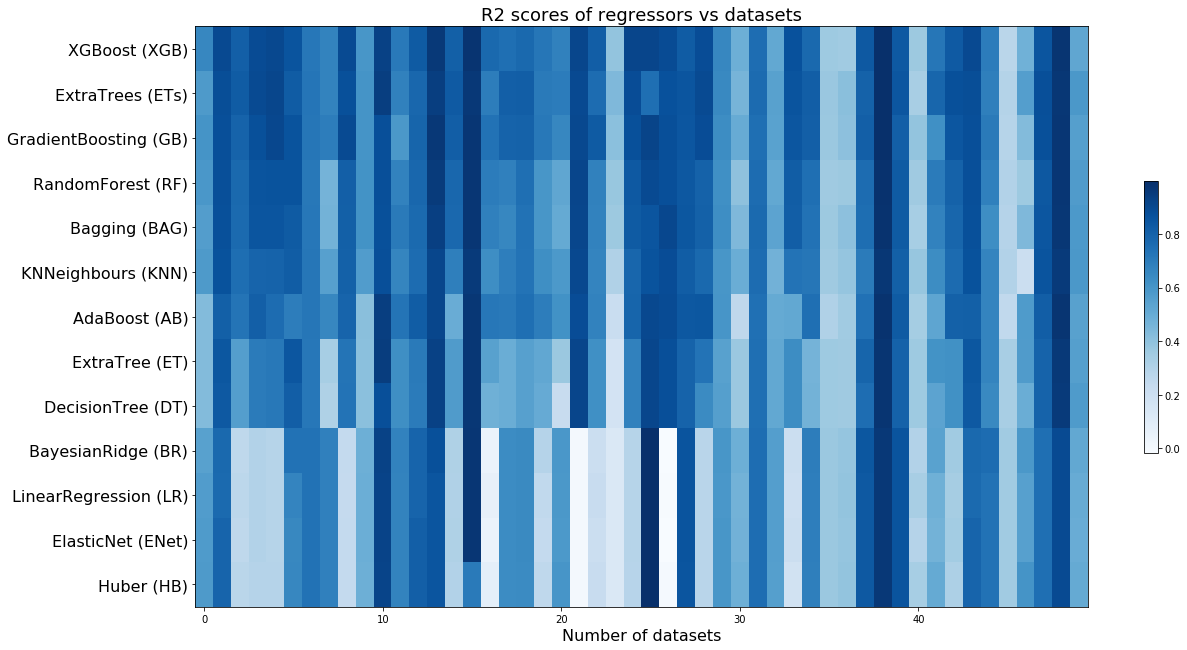

In [5]:
# plot r2-clf matrix
r2_clf_matrix = np.zeros(shape=(n_clf, n_datasets), dtype=float)
plt.figure(figsize=(20, 20))

print('Plotting regressors vs datasets...')

for x, clf in enumerate(clf_sorted):
    r2_clf_matrix[x] = r2_dict[clf]

plt.title('R2 scores of regressors vs datasets', size=18)
plt.xlabel('Number of datasets', size=16)
plt.yticks(range(n_clf), y_labels, size=16)
plt.imshow(r2_clf_matrix, cmap='Blues', aspect=2.5)
plt.colorbar(shrink=0.25)
plt.show()

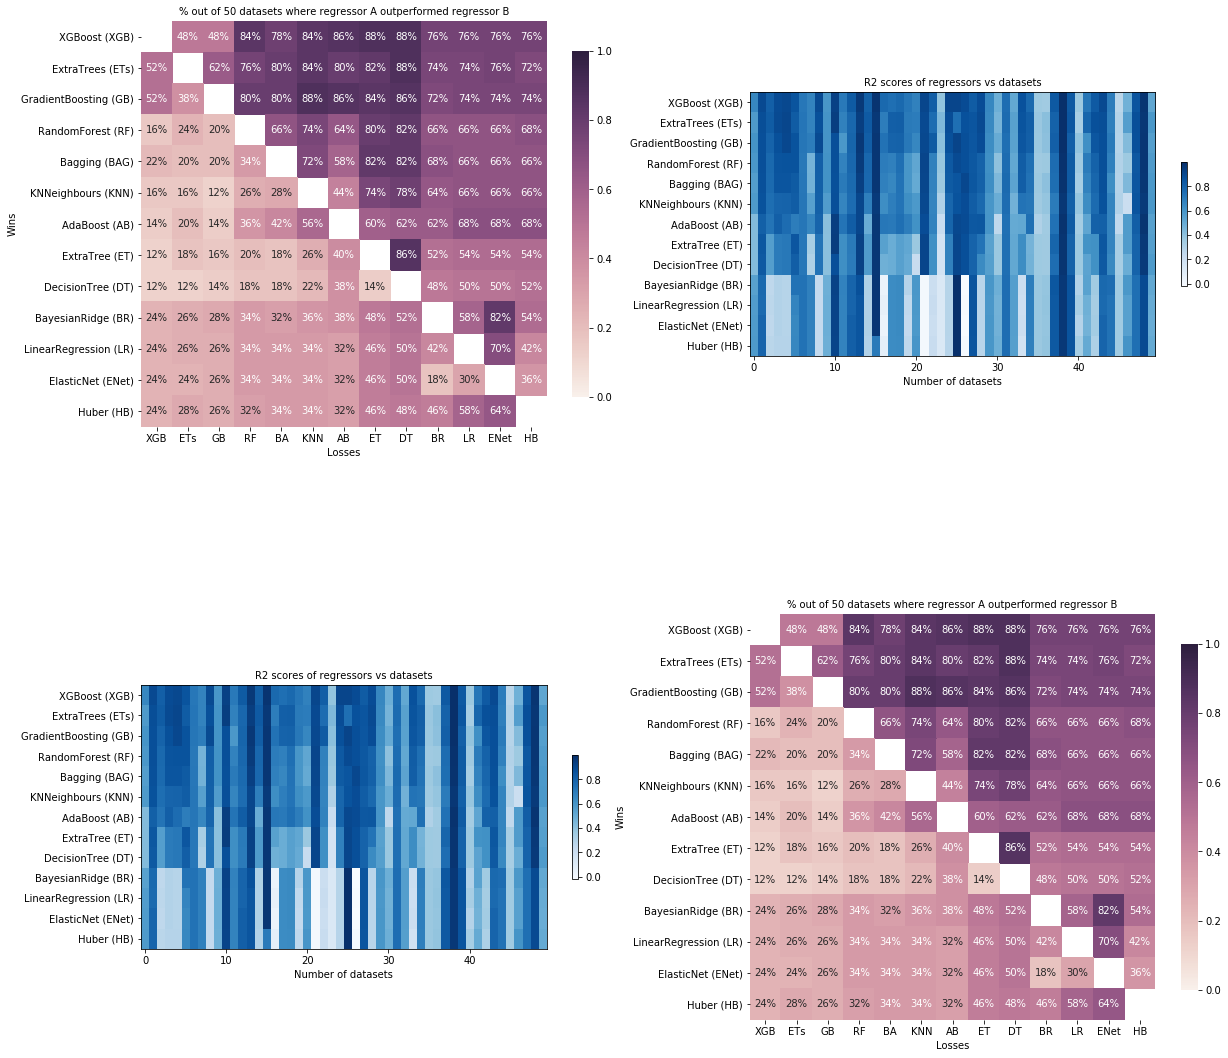

Processing results for optimisation ...
Processing results for no optimisation ...

Datasets for negative results ...
[('573_cpu_act.tsv.tabular', -0.001953381205696118), ('197_cpu_act.tsv.tabular', -0.0021926362480740613), ('294_satellite_image.tsv.tabular', -0.1007403058794312), ('201_pol.tsv.tabular', -0.033543040869019186)]



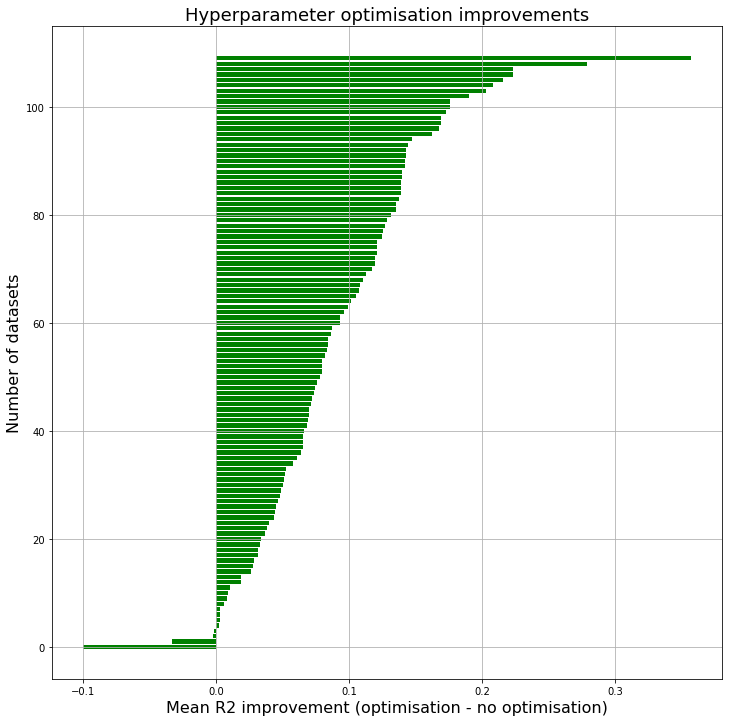

In [43]:
# plot average performance on datasets

folder_name_tuning = "tuning/"
folder_name_no_tuning = "no_tuning/"
clf_names_dir_tuning = os.listdir(folder_name_tuning)
clf_names_dir_no_tuning = os.listdir(folder_name_no_tuning)

file_obj = open("file_names.txt", "r")
dataset_names = file_obj.read()
dataset_names = dataset_names.split("\n")

clf_names_tuning = list()
clf_mean_r2_tuning = list()
r2_dict_tuning = dict()
fit_time_dict_tuning = dict()

print("Processing results for optimisation ...")

for clf in clf_names_dir_tuning:
    data_path = folder_name_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    opt_fnames = list()
    for f_name in files:
        if f_name in dataset_names:
            opt_fnames.append(f_name)
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_tuning.append(clf)
    r2_dict_tuning[clf] = r2_scores

clf_names_no_tuning = list()
clf_mean_r2_no_tuning = list()
r2_dict_no_tuning = dict()
fit_time_dict_no_tuning = dict()

print("Processing results for no optimisation ...")

for clf in clf_names_dir_no_tuning:
    data_path = folder_name_no_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    no_opt_fnames = list()
    for f_name in files:
        if f_name in dataset_names:
            no_opt_fnames.append(f_name)
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_no_tuning.append(clf)
    r2_dict_no_tuning[clf] = r2_scores

n_datasets = len(no_opt_fnames)
n_clf = len(clf_names_no_tuning)
clf_datasets_perf = np.zeros(shape=(n_clf, n_datasets), dtype=float)
diff_dict = dict()
for x, clf in enumerate(clf_names_no_tuning):
    tuning_perf = r2_dict_tuning[clf]
    no_tuning_perf = r2_dict_no_tuning[clf]
    diff = [(a-b) for a,b in zip(tuning_perf, no_tuning_perf)]
    diff_dict[clf] = diff
    clf_datasets_perf[x] = diff

mean_perf_datasets = np.mean(clf_datasets_perf, axis=0)

c_fname = [(a,b) for (a,b) in zip(opt_fnames, mean_perf_datasets) if b < 0.0]
print("")
print("Datasets for negative results ...")
print(c_fname)
print("")

plt.figure(figsize=(12, 12))
y_pos = np.arange(n_datasets)
plt.barh(y_pos, sorted(mean_perf_datasets), color='g')
plt.xlabel('Mean R2 improvement (optimisation - no optimisation)', size=16)
plt.ylabel('Number of datasets', size=16)
plt.title('Hyperparameter optimisation improvements', size=18)
plt.grid(True)
plt.show()
    


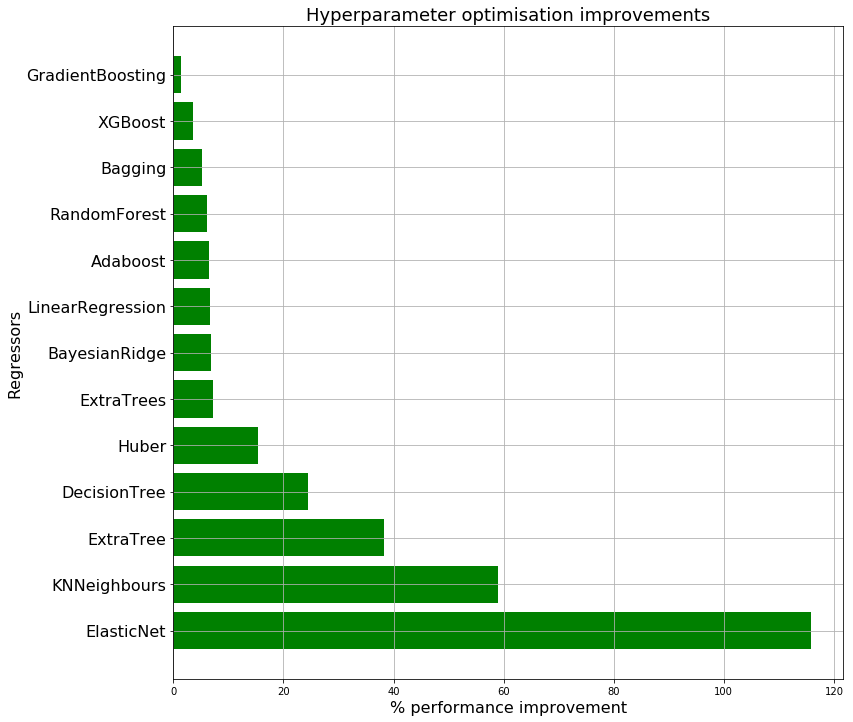

In [39]:
# plot hyperparameter tuninig improvement per regressor
hyper_improvement = dict()

for clf in clf_names_no_tuning:
    mean_no_tuning = np.mean(r2_dict_no_tuning[clf])
    mean_tuning = np.mean(r2_dict_tuning[clf])
    diff = (mean_tuning - mean_no_tuning) / float(mean_no_tuning) * 100
    hyper_improvement[clf] = np.round(diff, 2)

hyper_improvement = sorted(hyper_improvement.items(), key=lambda kv: kv[1], reverse=True)

y_labels = list()
improvement = list()
for k,v in hyper_improvement:
    y_labels.append(k)
    improvement.append(v)

plt.figure(figsize=(12, 12))
plt.yticks(range(len(y_labels)), y_labels, size=16)
y_pos = np.arange(len(y_labels))
plt.barh(y_pos, improvement, color='g')
plt.xlabel('% performance improvement', size=16)
plt.ylabel('Regressors', size=16)
plt.title('Hyperparameter optimisation improvements', size=18)
plt.grid(True)
plt.show()
    
    

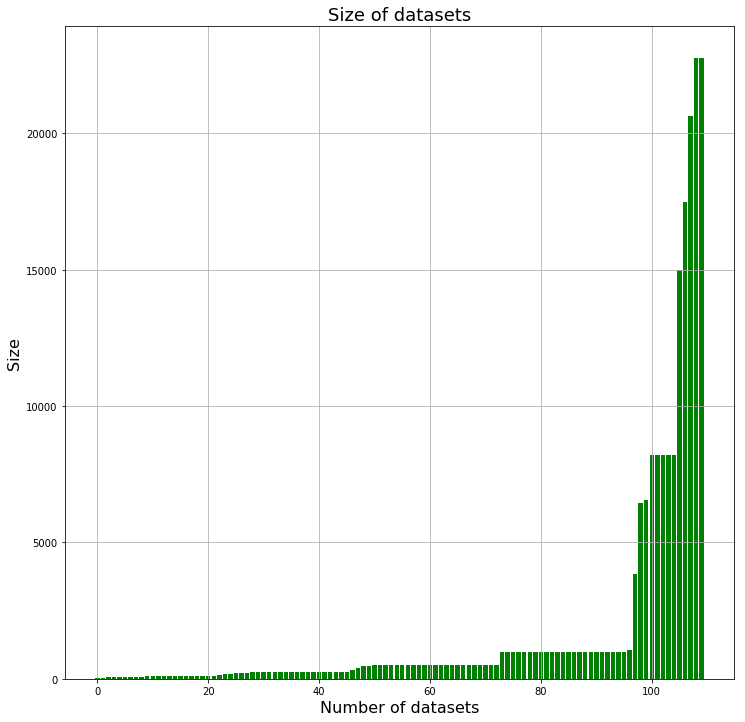

In [44]:
# plot dataset sizes

data_folder_name = "data_used/"
d_lengths = list()

for f_name in dataset_names:
    f_name_modified = f_name.split(".")
    f_name_modified = ".".join(f_name_modified[0:len(f_name_modified) - 1])
    try:
        ds_path = data_folder_name + f_name_modified
        df = pd.read_csv(ds_path, sep="\t")
        d_lengths.append(len(df))
    except:
        continue
plt.figure(figsize=(12, 12))
y_pos = np.arange(n_datasets)
plt.bar(y_pos, sorted(d_lengths), color='g')
plt.xlabel('Number of datasets', size=16)
plt.ylabel('Size', size=16)
plt.title('Size of datasets', size=18)
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sb.heatmap(performance_datasets,
           fmt='0.0%',
           mask=mask_matrix,
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0.0, vmax=1.0,
           xticklabels=x_labels, yticklabels=y_labels, 
           cbar=True, 
           cbar_kws={"shrink": 0.7}
          )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Losses', fontsize=10)
plt.ylabel('Wins', fontsize=10)
plt.title('% out of '+ str(n_datasets) +' datasets where regressor A outperformed regressor B', fontsize=10)

plt.subplot(2, 2, 2)
plt.title('R2 scores of regressors vs datasets', size=10)
plt.xlabel('Number of datasets', size=10)
plt.yticks(range(n_clf), y_labels, size=10)
plt.imshow(r2_clf_matrix, cmap='Blues', aspect=2.5)
plt.colorbar(shrink=0.25)

plt.subplot(2, 2, 3)
plt.title('R2 scores of regressors vs datasets', size=10)
plt.xlabel('Number of datasets', size=10)
plt.yticks(range(n_clf), y_labels, size=10)
plt.imshow(r2_clf_matrix, cmap='Blues', aspect=2.5)
plt.colorbar(shrink=0.25)

plt.subplot(2, 2, 4)
sb.heatmap(performance_datasets,
           fmt='0.0%',
           mask=mask_matrix,
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0.0, vmax=1.0,
           xticklabels=x_labels, yticklabels=y_labels, 
           cbar=True, 
           cbar_kws={"shrink": 0.7}
          )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Losses', fontsize=10)
plt.ylabel('Wins', fontsize=10)
plt.title('% out of '+ str(n_datasets) +' datasets where regressor A outperformed regressor B', fontsize=10)

plt.show()